In [2]:
import tensorflow as tf

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv

In [4]:
from mpl_toolkits import mplot3d

## Testing 3D ploting

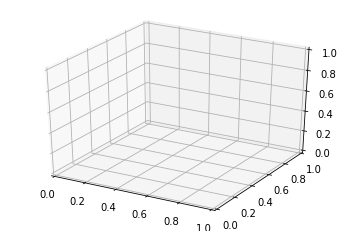

In [4]:
fig = plt.figure()
ax = plt.axes(projection='3d')

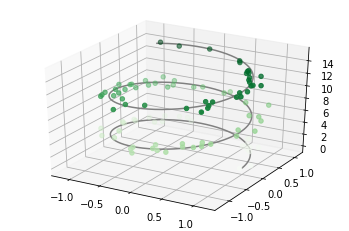

In [5]:
ax = plt.axes(projection='3d')
# Data for a three-dimensional line
zline = np.linspace(0, 15, 1000)
xline = np.cos(zline)
yline = np.sin(zline)
ax.plot3D(xline, yline, zline, 'gray')

# Data for three-dimensional scattered points
zdata = 15 * np.random.random(100)
xdata = np.cos(zdata) + 0.1 * np.random.randn(100)
ydata = np.sin(zdata) + 0.1 * np.random.randn(100)
ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='Greens');
plt.show()

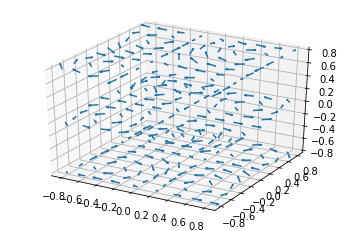

In [6]:
fig = plt.figure()
ax = fig.gca(projection='3d')

# Make the grid
x, y, z = np.meshgrid(np.arange(-0.8, 1, 0.2),
                      np.arange(-0.8, 1, 0.2),
                      np.arange(-0.8, 1, 0.8))

# Make the direction data for the arrows
u = np.sin(np.pi * x) * np.cos(np.pi * y) * np.cos(np.pi * z)
v = -np.cos(np.pi * x) * np.sin(np.pi * y) * np.cos(np.pi * z)
w = (np.sqrt(2.0 / 3.0) * np.cos(np.pi * x) * np.cos(np.pi * y) *
     np.sin(np.pi * z))

ax.quiver(x,y,z,u,v,w, length=0.1, normalize=True)

plt.show()

## Open .txt file with directions

In [7]:
directions=np.loadtxt("/media/david/ssd1/dataset/kitti/odometry/dataset/trajectories/00.txt")

In [8]:
X=directions[:,1]
Y=directions[:,2]
Z=directions[:,3]
roll=directions[:,4]
pitch=directions[:,5]
yaw=directions[:,6]

## Plotting the route

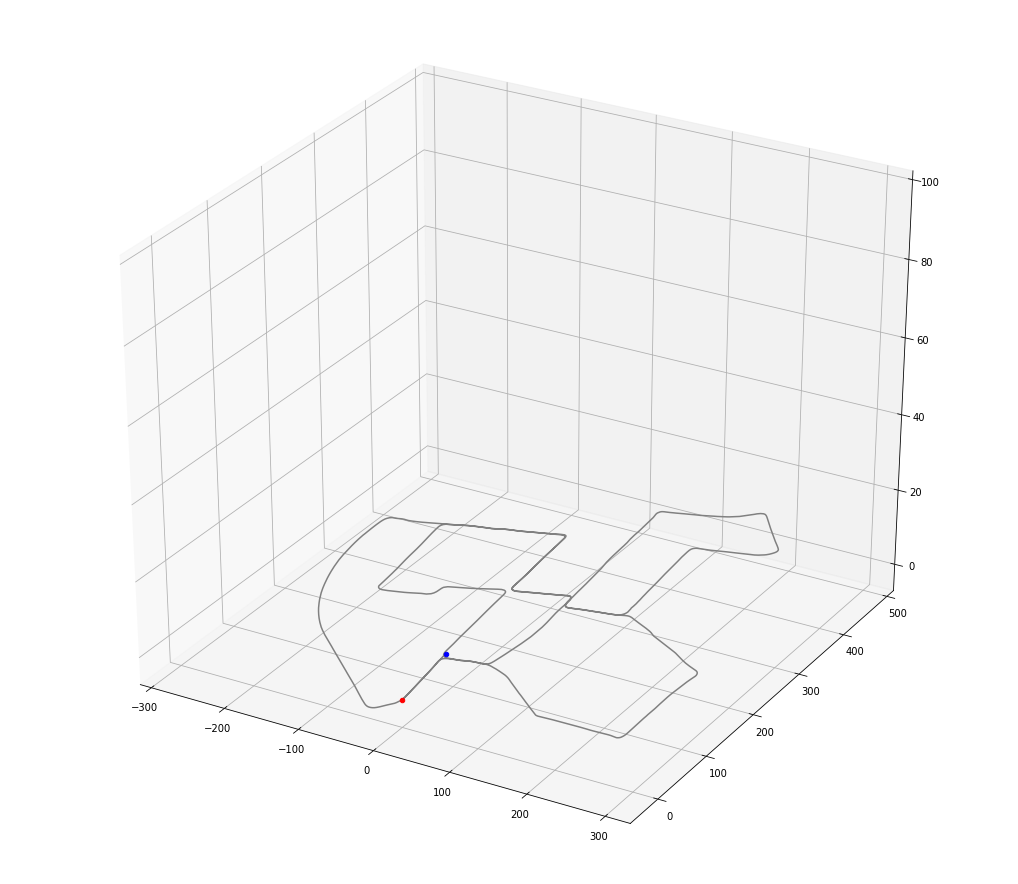

In [9]:
fig = plt.figure(figsize=(18, 16))
street = fig.gca(projection='3d')
# Data for a three-dimensional line
street.plot3D(X, Y, Z,'gray')
street.scatter(X[0], Y[0], Z[0],c='red')
street.scatter(X[-1], Y[-1], Z[-1],c='blue')
street.set_zlim(-5,100)
plt.show()

## Plotting route with directions on 3D

In [10]:
Rmarray=np.array([np.array([[(np.cos(psi)*np.cos(theta)),(np.cos(psi)*np.sin(phi)*np.sin(theta)-np.cos(phi)*np.sin(psi)),(np.sin(phi)*np.sin(psi)+np.cos(phi)*np.cos(psi)*np.sin(theta))],
                              [(np.cos(theta)*np.sin(psi)),(np.cos(phi)*np.cos(psi)+np.sin(phi)*np.sin(psi)*np.sin(theta)),(np.cos(phi)*np.sin(psi)*np.sin(theta)-np.cos(psi)*np.sin(phi))],
                              [(-np.sin(theta)),(np.cos(theta)*np.sin(phi)),(np.cos(phi)*np.cos(theta))]]) for (phi,theta,psi) in zip(roll,pitch,yaw)])
Vectors=np.array([np.dot(Matrix,(10,0,0)) for Matrix in Rmarray])
Vectors[:,0]

array([ 0.0042768 , -0.0229886 , -0.06962064, ..., -0.55770802,
       -0.55331092, -0.54245769])

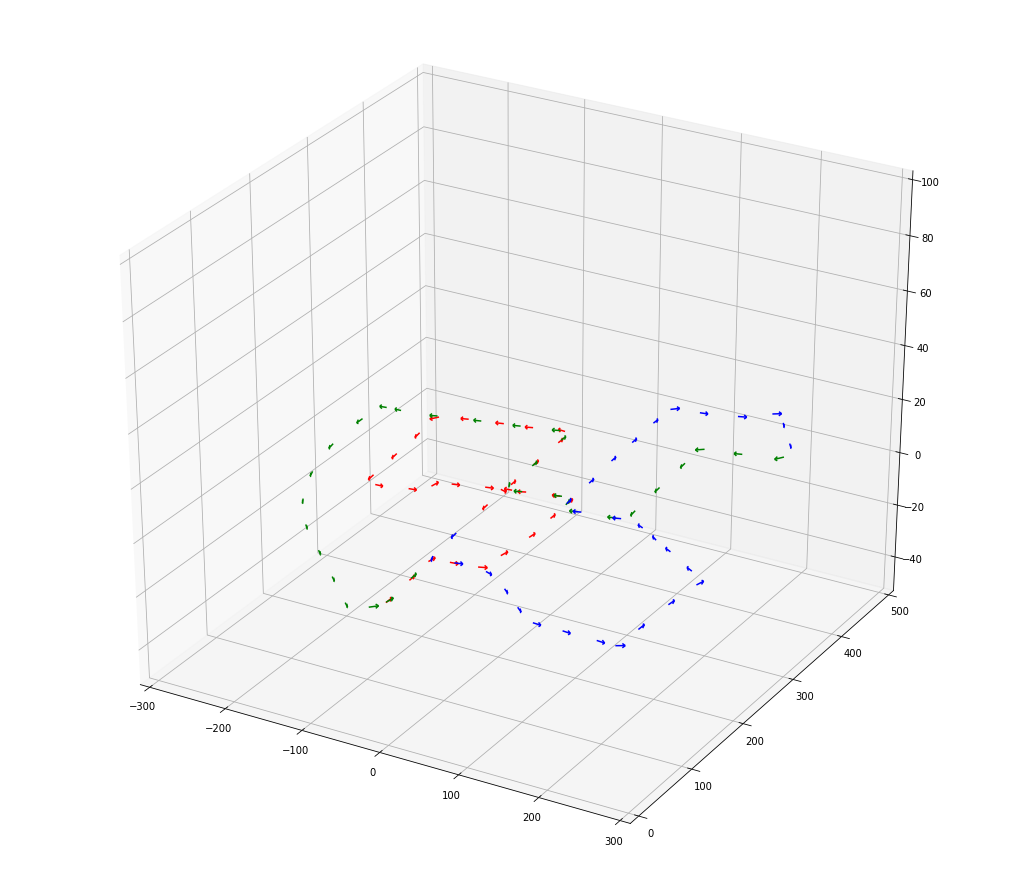

In [11]:
fig = plt.figure(figsize=(18, 16))
arrows = fig.gca(projection='3d')
time=50
first=0
last=1500
arrows.quiver(X[first:last:time],Y[first:last:time],Z[first:last:time],Vectors[first:last:time,0],Vectors[first:last:time,1],Vectors[first:last:time,2], length=10, normalize=True,color="red")
first=1501
last=3000
arrows.quiver(X[first:last:time],Y[first:last:time],Z[first:last:time],Vectors[first:last:time,0],Vectors[first:last:time,1],Vectors[first:last:time,2], length=10, normalize=True,color="blue")
first=3000
last=-1
arrows.quiver(X[first:last:time],Y[first:last:time],Z[first:last:time],Vectors[first:last:time,0],Vectors[first:last:time,1],Vectors[first:last:time,2], length=10, normalize=True,color="green")

arrows.set_xlim(-300,300)
arrows.set_ylim(-5,500)
arrows.set_zlim(-50,100)
plt.show()

## Changing to quaternions

In [10]:
def Euler2Quaternion(roll,pitch,yaw):
    cy = np.cos(yaw * 0.5);
    sy = np.sin(yaw * 0.5);
    cp = np.cos(pitch * 0.5);
    sp = np.sin(pitch * 0.5);
    cr = np.cos(roll * 0.5);
    sr = np.sin(roll * 0.5);

    w = cy * cp * cr + sy * sp * sr;
    x = cy * cp * sr - sy * sp * cr;
    y = sy * cp * sr + cy * sp * cr;
    z = sy * cp * cr - cy * sp * sr;

    return np.array([w,x,y,z])

In [11]:
Quat= np.array([Euler2Quaternion(phi,theta,psi) for phi,theta,psi in zip(roll,pitch,yaw)])
Quat[0]

array([ 7.07257905e-01, -3.09033366e-04, -5.40648599e-03,  7.06934884e-01])

In [12]:
conQuat= np.array([[quat[0],-quat[1],-quat[2],-quat[3]] for quat in Quat])
conQuat[0]

array([ 7.07257905e-01,  3.09033366e-04,  5.40648599e-03, -7.06934884e-01])

In [13]:
def Hamiltonmult(quat1,quat2):
    return np.array([quat1[0]*quat2[0]-quat1[1]*quat2[1]-quat1[2]*quat2[2]-quat1[3]*quat2[3],
                     quat1[0]*quat2[1]+quat1[1]*quat2[0]+quat1[2]*quat2[3]-quat1[3]*quat2[2],
                     quat1[0]*quat2[2]-quat1[1]*quat2[3]+quat1[2]*quat2[0]+quat1[3]*quat2[1],
                     quat1[0]*quat2[3]+quat1[1]*quat2[2]-quat1[2]*quat2[1]+quat1[3]*quat2[0]])

In [14]:
quatvectors= np.array([Hamiltonmult(Hamiltonmult(quat,np.array([0,10,0,0])),conquat) for quat,conquat in zip(Quat,conQuat)])

<IPython.core.display.Javascript object>


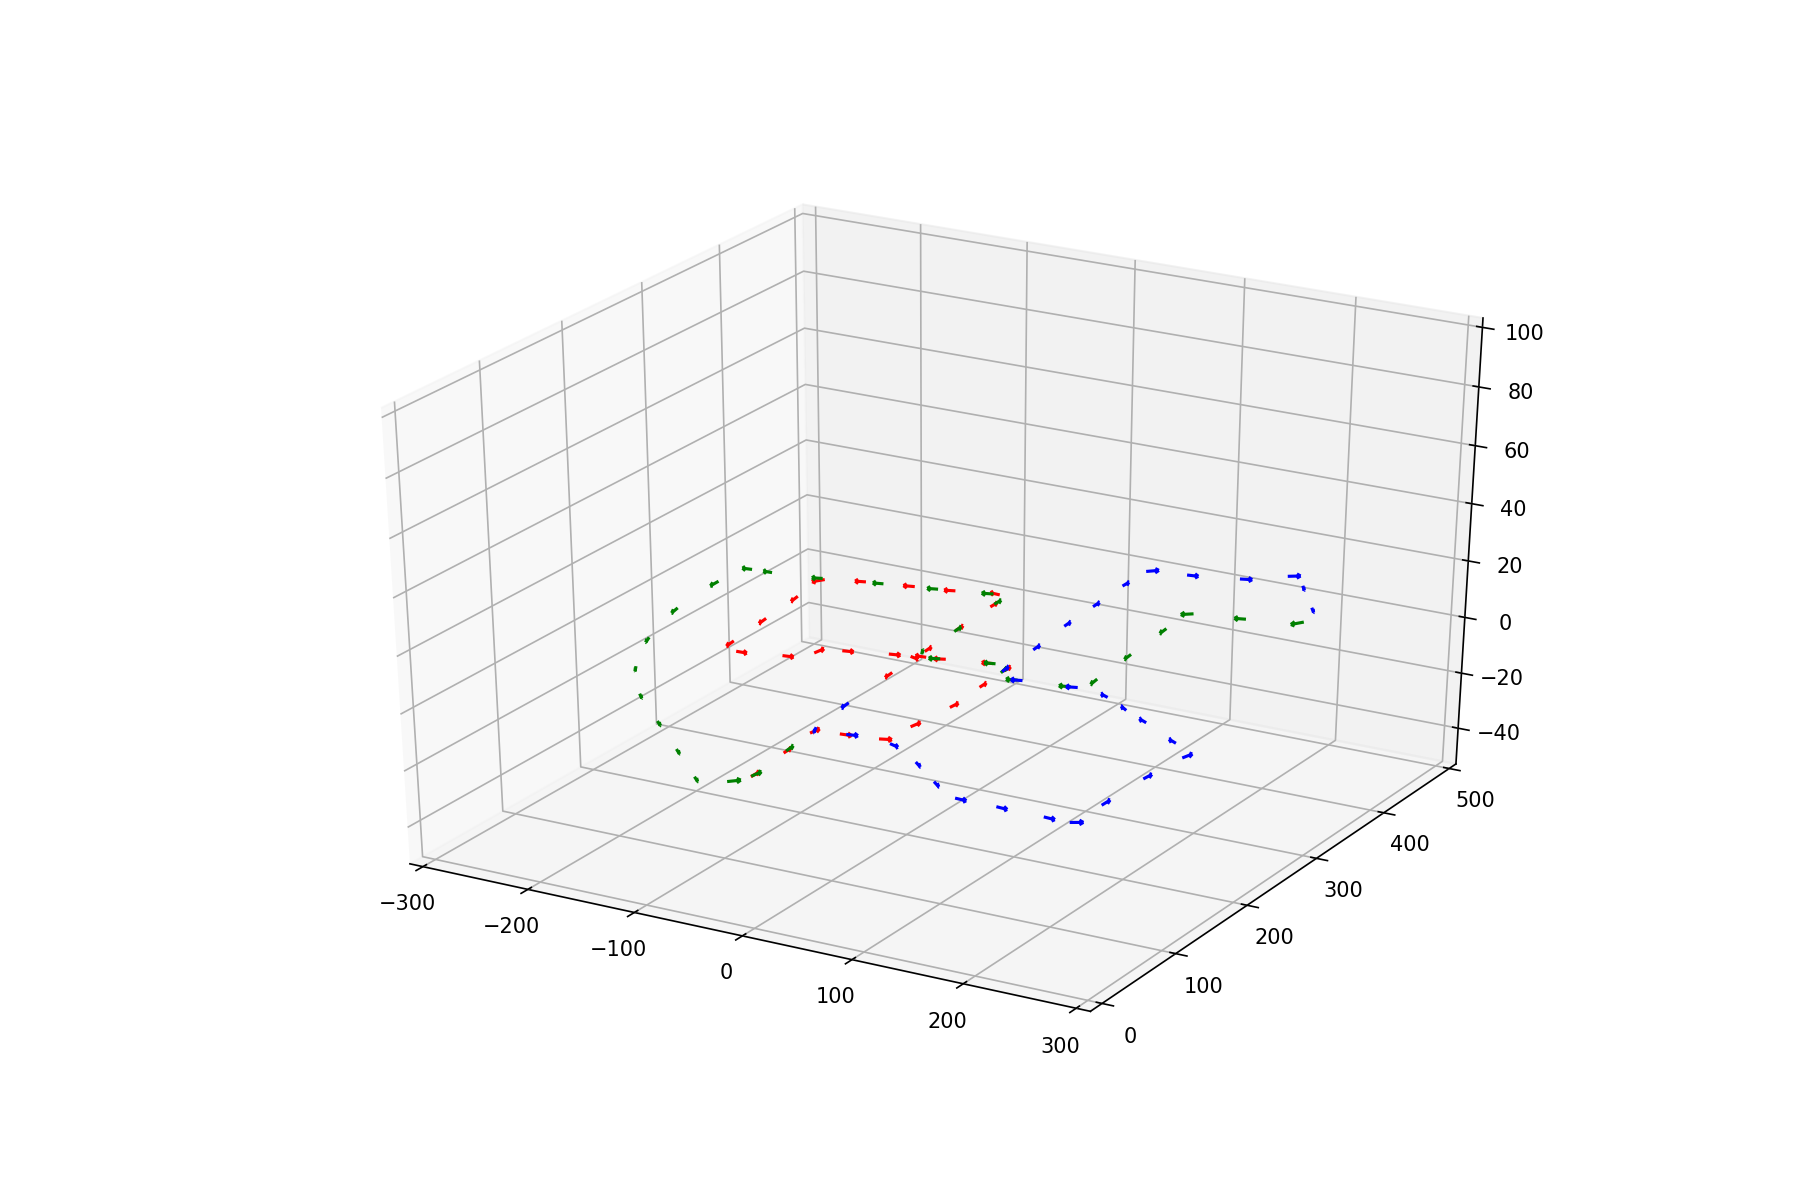

In [17]:
%matplotlib notebook

fig = plt.figure(figsize=(12, 8))
arrows2 = fig.gca(projection='3d')
time=50
first=0
last=1500
arrows2.quiver(X[first:last:time],Y[first:last:time],Z[first:last:time],quatvectors[first:last:time,1],quatvectors[first:last:time,2],quatvectors[first:last:time,3], length=10, normalize=True,color="red")
first=1501
last=3000
arrows2.quiver(X[first:last:time],Y[first:last:time],Z[first:last:time],quatvectors[first:last:time,1],quatvectors[first:last:time,2],quatvectors[first:last:time,3], length=10, normalize=True,color="blue")
first=3000
last=-1
arrows2.quiver(X[first:last:time],Y[first:last:time],Z[first:last:time],quatvectors[first:last:time,1],quatvectors[first:last:time,2],quatvectors[first:last:time,3], length=10, normalize=True,color="green")

arrows2.set_xlim(-300,300)
arrows2.set_ylim(-5,500)
arrows2.set_zlim(-50,100)
plt.show()

## Calculating differences 

In [15]:
print(Quat[0],Quat[1])

[ 7.07257905e-01 -3.09033366e-04 -5.40648599e-03  7.06934884e-01] [ 0.70629251  0.00120939 -0.00468187  0.7079036 ]


In [16]:
## Get the Dr for that rotation
temp=Hamiltonmult(Quat[1],conQuat[0])
temp

array([9.99997649e-01, 5.56119866e-04, 1.58099486e-03, 1.37559203e-03])

In [17]:
## Add Dr to a previous rotaton to get the next one
Hamiltonmult(temp,Quat[0])

array([ 0.70629251,  0.00120939, -0.00468187,  0.7079036 ])

In [18]:
DeltasT=np.array([[0,0,0]])
for i in range (1,len(X),1):
    dlta= np.array([[X[i]-X[i-1],Y[i]-Y[i-1],Z[i]-Z[i-1]]])
    DeltasT=np.append(DeltasT,dlta,axis=0)
print(DeltasT[0])
DeltasT=np.delete(DeltasT,0,axis=0)
print(DeltasT[0])

[0. 0. 0.]
[-3.79494596e-04  6.72624306e-01  2.45357960e-02]


In [19]:
DeltasR=np.array([[0,0,0,0]])
for i in range (1,len(Quat),1):
    dlta= np.array([Hamiltonmult(Quat[i],conQuat[i-1])])
    DeltasR=np.append(DeltasR,dlta,axis=0)
print(DeltasR[0])
DeltasR=np.delete(DeltasR,0,axis=0)
print(DeltasR[0])

[0. 0. 0. 0.]
[9.99997649e-01 5.56119866e-04 1.58099486e-03 1.37559203e-03]


## Now its time to append the translations and the rotations to see if everything is as it should

<IPython.core.display.Javascript object>


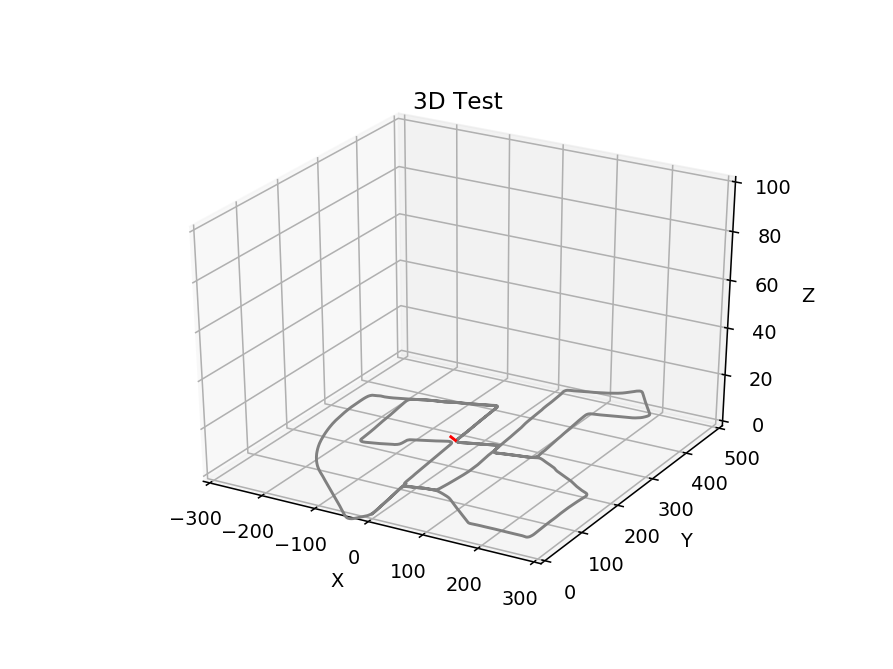

In [21]:
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d.axes3d as p3
import matplotlib.animation as animation

# Fixing random state for reproducibility
def quiver_data_to_segments(X, Y, Z, u, v, w, length=3):
    segments = (X, Y, Z, X+u*length, Y+v*length, Z+w*length)
    segments = np.array(segments).reshape(6,-1)
    return [[[x, y, z], [u, v, w]] for x, y, z, u, v, w in zip(*list(segments))]

def update_lines(num,X,Y,Z,vectors,lines):
    segment= quiver_data_to_segments(X[num],Y[num],Z[num],
                                 vectors[num,1],
                                 vectors[num,2],
                                 vectors[num,3])
    lines.set_segments(segment)
    return lines

# Attaching 3D axis to the figure
fig = plt.figure()
ax = fig.gca(projection='3d')


# Creating fifty line objects.
# NOTE: Can't pass empty arrays into 3d version of plot()
stuff = ax.plot3D(X, Y, Z,'gray')
lines = ax.quiver(X[0:1],Y[0:1],Z[0:1],
                                 quatvectors[:1,1],
                                 quatvectors[:1,2],
                                 quatvectors[:1,3],
                                 length=20, normalize=True,color="red",arrow_length_ratio=5)

# Setting the axes properties
ax.set_xlim3d([-300, 300])
ax.set_xlabel('X')

ax.set_ylim3d([0.0, 500])
ax.set_ylabel('Y')

ax.set_zlim3d([0.0, 100.0])
ax.set_zlabel('Z')

ax.set_title('3D Test')

# Creating the Animation object
line_ani = animation.FuncAnimation(fig, update_lines, 4530, fargs=(X,Y,Z,quatvectors,lines),
                                   interval=3, blit=False)

plt.show()

In [24]:
newpositions=np.array([[X[0],Y[0],Z[0]]])
n2ewpositions=newpositions[-1]+DeltasT[0].reshape(1,3)
newpositions=np.append(newpositions,n2ewpositions,axis=0)

In [25]:
newpositions

array([[-0.0119846 , -0.29219686,  0.05403984],
       [-0.01236409,  0.38042744,  0.07857564]])

In [26]:
NewDirections=Quat[0].reshape(1,4)
NewDirections.shape
tempdirections=Hamiltonmult(DeltasR[0],NewDirections[-1]).reshape(1,4)
NewDirections=np.append(NewDirections,tempdirections,axis=0)

In [27]:
NewDirections

array([[ 7.07257905e-01, -3.09033366e-04, -5.40648599e-03,
         7.06934884e-01],
       [ 7.06292508e-01,  1.20938507e-03, -4.68186780e-03,
         7.07903602e-01]])

<IPython.core.display.Javascript object>


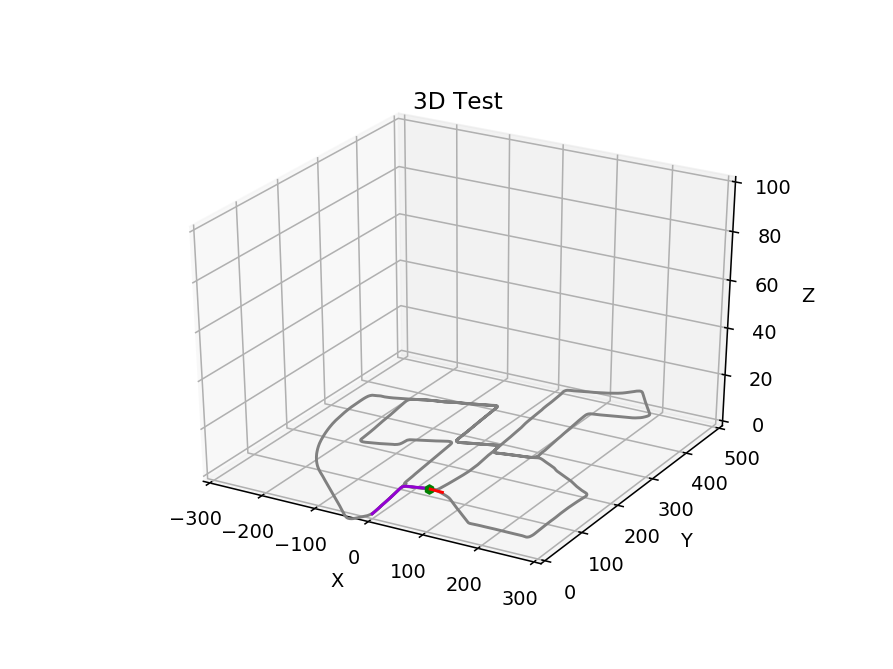

In [41]:
NewPositions=np.array([[X[0],Y[0],Z[0]]])
NewDirections=Quat[0].reshape(1,4)

# Fixing random state for reproducibility
def quiver_data_to_segments(X, Y, Z, u, v, w, length=3):
    segments = (X, Y, Z, X+u*length, Y+v*length, Z+w*length)
    segments = np.array(segments).reshape(6,-1)
    return [[[x, y, z], [u, v, w]] for x, y, z, u, v, w in zip(*list(segments))]

def update_lines(num,lines):
    global NewPositions
    global NewDirections
    
    temppos=NewPositions[-1]+DeltasT[num].reshape(1,3)
    NewPositions=np.append(NewPositions,temppos,axis=0)
    
    tempdirections=Hamiltonmult(DeltasR[num],NewDirections[-1]).reshape(1,4)
    NewDirections=np.append(NewDirections,tempdirections,axis=0)
    
    Dirvector= Hamiltonmult(Hamiltonmult(NewDirections[-1],np.array([0,10,0,0])),
                            NewDirections[-1]*[1,-1,-1,-1]).reshape(1,4)
    
    lines.set_data(NewPositions[:,0],NewPositions[:,1])
    lines.set_3d_properties(NewPositions[:,2])
    
    segment= quiver_data_to_segments(NewPositions[-1,0],NewPositions[-1,1],NewPositions[-1,2],
                                 Dirvector[:,1],
                                 Dirvector[:,2],
                                 Dirvector[:,3])
    arrows.set_segments(segment)
    
    graph._offsets3d=(NewPositions[-1:,0],NewPositions[-1:,1],NewPositions[-1:,2])
    
    return lines

# Attaching 3D axis to the figure
fig = plt.figure()
ax = fig.gca(projection='3d')


# Creating fifty line objects.
# NOTE: Can't pass empty arrays into 3d version of plot()
stuff = ax.plot3D(X, Y, Z,'gray')
lines = ax.plot3D(NewPositions[:,0],NewPositions[:,1],NewPositions[:,2],'darkviolet')
arrows =ax.quiver(NewPositions[:,0],NewPositions[:,1],NewPositions[:,2],
                                 quatvectors[:1,1],
                                 quatvectors[:1,2],
                                 quatvectors[:1,3],
                                 length=20, normalize=True,color="red",arrow_length_ratio=0.5)
graph= ax.scatter(NewPositions[0,1],NewPositions[0,1],NewPositions[0,2],c="green",marker="h")
# Setting the axes properties
ax.set_xlim3d([-300, 300])
ax.set_xlabel('X')

ax.set_ylim3d([0.0, 500])
ax.set_ylabel('Y')

ax.set_zlim3d([0.0, 100.0])
ax.set_zlabel('Z')

ax.set_title('3D Test')

# Creating the Animation object
line_ani = animation.FuncAnimation(fig, update_lines, 4530, fargs=(lines),
                                   interval=3, blit=False)

plt.show()

In [87]:
Odometryresults=np.loadtxt("test.txt")
DT_nn=Odometryresults[1:,0:3]
DQ_nn=Odometryresults[1:,3:]
temppos=NewPositions_nn[-1]+DT_nn[0].reshape(1,3)
NewPositions_nn=np.append(NewPositions_nn,temppos,axis=0)
NewPositions_nn[-1]

array([41.42777015, 38.29197842,  0.57463903])

<IPython.core.display.Javascript object>


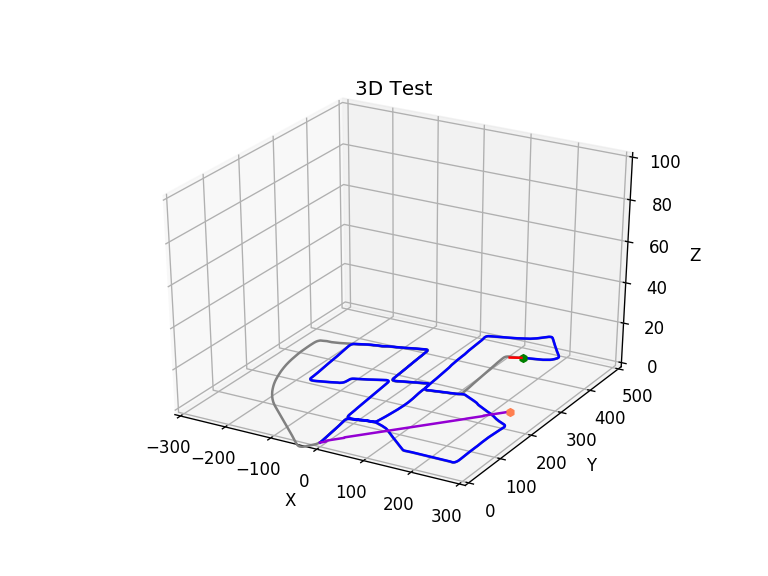

In [88]:
NewPositions=np.array([[X[0],Y[0],Z[0]]])
NewDirections=Quat[0].reshape(1,4)

NewPositions_nn=np.array([[X[0],Y[0],Z[0]]])
NewDirections_nn=Quat[0].reshape(1,4)

# Fixing random state for reproducibility
def quiver_data_to_segments(X, Y, Z, u, v, w, length=3):
    segments = (X, Y, Z, X+u*length, Y+v*length, Z+w*length)
    segments = np.array(segments).reshape(6,-1)
    return [[[x, y, z], [u, v, w]] for x, y, z, u, v, w in zip(*list(segments))]

def update_lines(num,lines,lines_nn):
    global NewPositions
    global NewDirections
    
    global NewPositions_nn
    global NewDirections_nn
    
    temppos=NewPositions[-1]+DeltasT[num].reshape(1,3)
    NewPositions=np.append(NewPositions,temppos,axis=0)
    
    tempdirections=Hamiltonmult(DeltasR[num],NewDirections[-1]).reshape(1,4)
    NewDirections=np.append(NewDirections,tempdirections,axis=0)
    
    Dirvector= Hamiltonmult(Hamiltonmult(NewDirections[-1],np.array([0,10,0,0])),
                            NewDirections[-1]*[1,-1,-1,-1]).reshape(1,4)
    
    lines.set_data(NewPositions[:,0],NewPositions[:,1])
    lines.set_3d_properties(NewPositions[:,2])
    
    segment= quiver_data_to_segments(NewPositions[-1,0],NewPositions[-1,1],NewPositions[-1,2],
                                 Dirvector[:,1],
                                 Dirvector[:,2],
                                 Dirvector[:,3])
    arrows.set_segments(segment)
    
    graph._offsets3d=(NewPositions[-1:,0],NewPositions[-1:,1],NewPositions[-1:,2])
    
#------------------------------------------------

    temppos=NewPositions_nn[-1]+DT_nn[num].reshape(1,3)
    NewPositions_nn=np.append(NewPositions_nn,temppos,axis=0)
    
    tempdirections=Hamiltonmult(DQ_nn[num],NewDirections_nn[-1]).reshape(1,4)
    NewDirections_nn=np.append(NewDirections_nn,tempdirections,axis=0)
    
    Dirvector= Hamiltonmult(Hamiltonmult(NewDirections_nn[-1],np.array([0,10,0,0])),
                            NewDirections_nn[-1]*[1,-1,-1,-1]).reshape(1,4)
    
    lines_nn.set_data(NewPositions_nn[:,0],NewPositions_nn[:,1])
    lines_nn.set_3d_properties(NewPositions_nn[:,2])
    
    segment= quiver_data_to_segments(NewPositions_nn[-1,0],NewPositions_nn[-1,1],NewPositions_nn[-1,2],
                                 Dirvector[:,1],
                                 Dirvector[:,2],
                                 Dirvector[:,3])
    
    arrows_nn.set_segments(segment)
    
    graph_nn._offsets3d=(NewPositions_nn[-1:,0],NewPositions_nn[-1:,1],NewPositions_nn[-1:,2])
    
    return lines

# Attaching 3D axis to the figure
fig = plt.figure()
ax = fig.gca(projection='3d')


# Creating fifty line objects.
# NOTE: Can't pass empty arrays into 3d version of plot()
stuff = ax.plot3D(X, Y, Z,'gray')
lines = ax.plot3D(NewPositions[:,0],NewPositions[:,1],NewPositions[:,2],'blue')[0]
arrows =ax.quiver(NewPositions[:,0],NewPositions[:,1],NewPositions[:,2],
                                 quatvectors[:1,1],
                                 quatvectors[:1,2],
                                 quatvectors[:1,3],
                                 length=20, normalize=True,color="red",arrow_length_ratio=0.5)

graph= ax.scatter(NewPositions[0,1],NewPositions[0,1],NewPositions[0,2],c="green",marker="h")


lines_nn = ax.plot3D(NewPositions_nn[:,0],NewPositions_nn[:,1],NewPositions_nn[:,2],'darkviolet')[0]
arrows_nn =ax.quiver(NewPositions_nn[:,0],NewPositions_nn[:,1],NewPositions_nn[:,2],
                                 quatvectors[:1,1],
                                 quatvectors[:1,2],
                                 quatvectors[:1,3],
                                 length=20, normalize=True,color="red",arrow_length_ratio=0.5)

graph_nn= ax.scatter(NewPositions_nn[0,1],NewPositions_nn[0,1],NewPositions_nn[0,2],c="coral",marker="h")

# Setting the axes properties
ax.set_xlim3d([-300, 300])
ax.set_xlabel('X')

ax.set_ylim3d([0.0, 500])
ax.set_ylabel('Y')

ax.set_zlim3d([0.0, 100.0])
ax.set_zlabel('Z')

ax.set_title('3D Test')

# Creating the Animation object
line_ani = animation.FuncAnimation(fig, update_lines, 4530, fargs=(lines,lines_nn),
                                   interval=3, blit=False)

plt.show()

In [69]:
    lines_nn.set_data(NewPositions_nn[:,0],NewPositions_nn[:,1])
    lines_nn.set_3d_properties(NewPositions_nn[:,2])

AttributeError: 'list' object has no attribute 'set_data'